# Project - Markov Simulation

- In this project, we will write a program that simulates customer behaviour in a supermarket.

# Data Exploration

In [1]:
# import base packages and dictionaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 4)
import seaborn as sns
sns.despine()
import time
import os 
import random
from faker import Faker
import warnings
warnings.filterwarnings('ignore')

<Figure size 720x288 with 0 Axes>

In [2]:
# get the data
monday    = pd.read_csv('../data/monday.csv',   sep=';', index_col=0, parse_dates=True)
tuesday   = pd.read_csv('../data/tuesday.csv',  sep=';', index_col=0, parse_dates=True)
wednesday = pd.read_csv('../data/wednesday.csv',sep=';', index_col=0, parse_dates=True)
thursday  = pd.read_csv('../data/thursday.csv', sep=';', index_col=0, parse_dates=True)
friday    = pd.read_csv('../data/friday.csv',   sep=';',  index_col=0, parse_dates=True)

In [3]:
# add weekday columns and write the day of week
monday['weekday']    = monday.index.day_name()
tuesday['weekday']   = tuesday.index.day_name()
wednesday['weekday'] = wednesday.index.day_name()
thursday['weekday']  = thursday.index.day_name()
friday['weekday']    = friday.index.day_name()

In [4]:
# concat the days together
df = pd.concat([monday, tuesday, wednesday, thursday, friday])

# convert the day_name into lower case
df['weekday'] = df['weekday'].str.lower()

In [5]:
df.head()

,customer_no,location,weekday
timestamp,,,
2019-09-02 07:03:00,1,dairy,monday
2019-09-02 07:03:00,2,dairy,monday
2019-09-02 07:04:00,3,dairy,monday
2019-09-02 07:04:00,4,dairy,monday
2019-09-02 07:04:00,5,spices,monday


In [6]:
# check the datatypes and null-values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24877 entries, 2019-09-02 07:03:00 to 2019-09-06 21:50:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  24877 non-null  int64 
 1   location     24877 non-null  object
 2   weekday      24877 non-null  object
dtypes: int64(1), object(2)
memory usage: 777.4+ KB


In [7]:
# add customer_id as a unique id
# combine customer_no and the first two letter of day to determine customer_id

df['customer_id'] = df['customer_no'].astype(str) + '_' + df['weekday'].astype(str).str[:2]
df.sample(10)

,customer_no,location,weekday,customer_id
timestamp,,,,
2019-09-03 16:50:00,872,checkout,tuesday,872_tu
2019-09-02 12:05:00,436,drinks,monday,436_mo
2019-09-06 20:03:00,1365,fruit,friday,1365_fr
2019-09-06 08:30:00,163,drinks,friday,163_fr
2019-09-05 14:33:00,701,dairy,thursday,701_th
2019-09-06 11:27:00,410,drinks,friday,410_fr
2019-09-05 19:00:00,1166,checkout,thursday,1166_th
2019-09-03 07:45:00,75,drinks,tuesday,75_tu
2019-09-04 10:06:00,388,checkout,wednesday,388_we


In [8]:
# total number of customers from monday to friday
df['customer_id'].nunique()

7445

In [9]:
# total number of customers who visit checkout  - 28 customers had no checkout
df[df['location'] == 'checkout']['customer_id'].nunique()

7417

In [10]:
# remove the customers who do not visit checkout

exit_time = df.reset_index().groupby(['customer_id'])['timestamp'].max()

for customer in df['customer_id'].unique():
    df.loc[
        (df.customer_id == customer) & (df.index == exit_time[customer]) & (df.location != 'checkout'),
        'check_out',
          ] = 0

In [11]:
remove_customer_list = []

for i in df[df['check_out'] == 0]['customer_id']:
    remove_customer_list.append(i)

remove_customer_list

['1439_mo',
 '1437_mo',
 '1443_mo',
 '1430_mo',
 '1433_mo',
 '1440_mo',
 '1441_mo',
 '1445_mo',
 '1446_mo',
 '1447_mo',
 '1422_tu',
 '1411_tu',
 '1527_we',
 '1528_we',
 '1520_we',
 '1529_we',
 '1530_we',
 '1527_th',
 '1532_th',
 '1533_th',
 '1506_fr',
 '1494_fr',
 '1503_fr',
 '1505_fr',
 '1496_fr',
 '1500_fr',
 '1509_fr',
 '1510_fr']

In [12]:
for j in remove_customer_list:
    df = df.reset_index().set_index('customer_id').drop(index=j, axis=0)


In [13]:
df.count()

timestamp      24798
customer_no    24798
location       24798
weekday        24798
check_out          0
dtype: int64

In [14]:
# drop checkout column

df = df.reset_index().set_index('timestamp').drop('check_out', axis=1)

In [15]:
# extract the hour, date, minute for whole data

df['hour'] = df.index.hour
df.head()

,customer_id,customer_no,location,weekday,hour
timestamp,,,,,
2019-09-02 07:03:00,1_mo,1,dairy,monday,7
2019-09-02 07:03:00,2_mo,2,dairy,monday,7
2019-09-02 07:04:00,3_mo,3,dairy,monday,7
2019-09-02 07:04:00,4_mo,4,dairy,monday,7
2019-09-02 07:04:00,5_mo,5,spices,monday,7


## Total number of customers in each section

In [16]:
columns = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']
df.groupby(['location','weekday'])['customer_no'].count().unstack()


weekday,friday,monday,thursday,tuesday,wednesday
location,,,,,
checkout,1502,1437,1532,1420,1526
dairy,923,887,961,909,971
drinks,838,794,774,710,773
fruit,1050,997,1040,975,1040
spices,787,746,789,691,726


Text(0, 0.5, '# of customers')

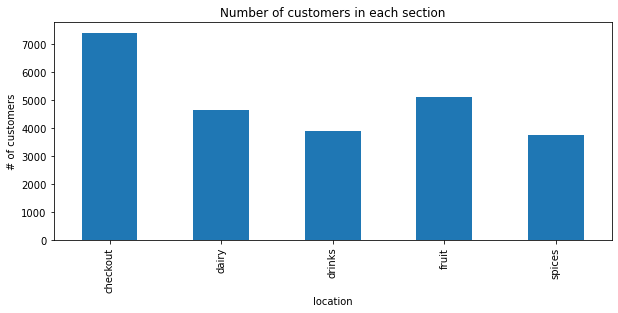

In [58]:
df.groupby(['location'])['customer_no'].count().plot(kind='bar')
plt.title(f'Number of customers in each section')
plt.xlabel('location')
plt.ylabel('# of customers')

Text(0, 0.5, '# of customers')

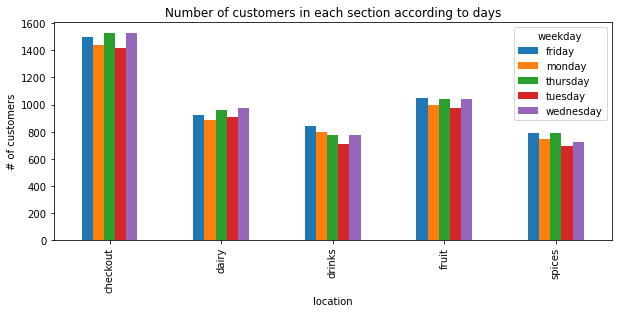

In [57]:
df.groupby(['location','weekday'])['customer_no'].count().unstack().plot(kind='bar')
plt.title(f'Number of customers in each section according to days')
plt.xlabel('location')
plt.ylabel('# of customers')

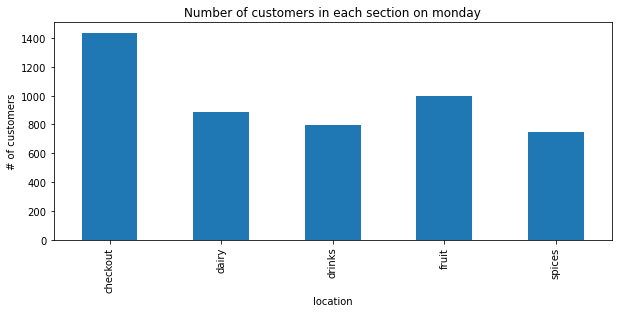

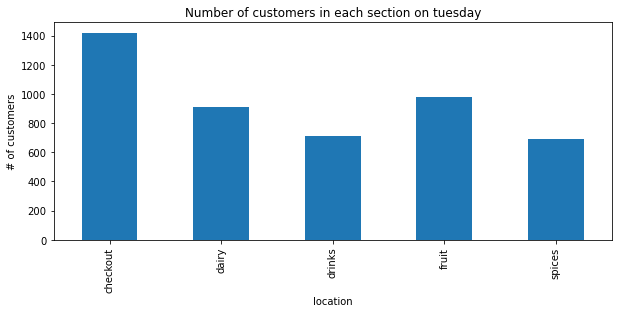

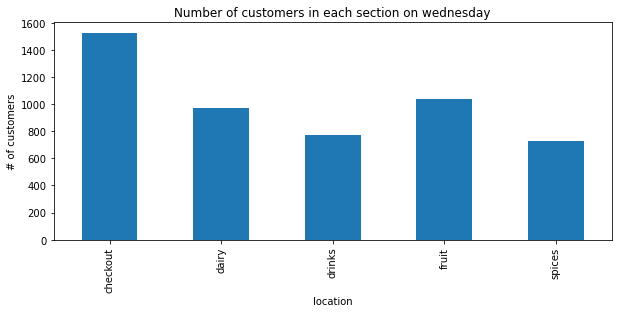

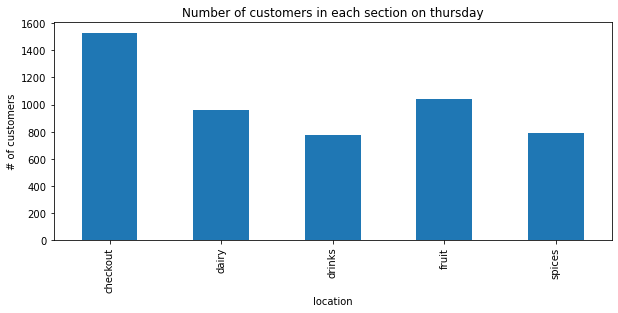

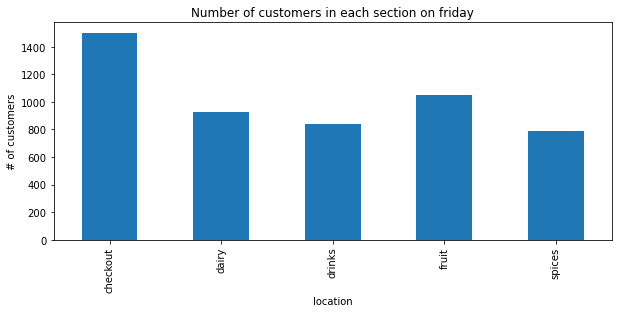

In [17]:
for day in df['weekday'].unique():
    plt.figure()
    df.loc[df['weekday'] == day].groupby(['location'])['customer_no'].count().plot(kind='bar')
    plt.title(f'Number of customers in each section on {day}')
    plt.xlabel('location')
    plt.ylabel('# of customers')

## Total number of customers in each section over time

In [18]:
df.groupby(['hour','location','weekday'])['customer_no'].count().unstack()

weekday        friday  monday  thursday  tuesday  wednesday
hour location                                              
7    checkout      87      92        99       91         85
     dairy         49      59        52       62         53
     drinks        53      60        48       70         47
     fruit         64      54        69       63         49
     spices        52      52        47       42         45
...               ...     ...       ...      ...        ...
21   checkout      52      52        83       62         56
     dairy         30      14        31       24         24
     drinks        28      25        44       40         27
     fruit         29      25        39       35         25
     spices        17      14        34       24         18

[75 rows x 5 columns]

Text(0, 0.5, '# of customers')

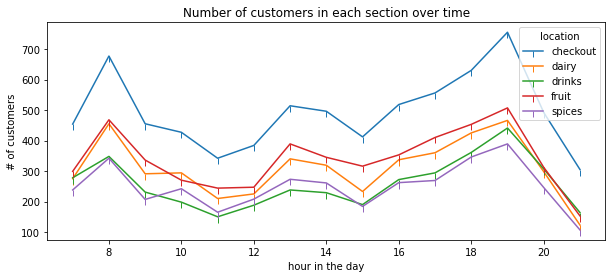

In [62]:
df.groupby(['hour','location'])['customer_no'].count().unstack().plot(marker=3)
plt.title(f'Number of customers in each section over time')
plt.xlabel('hour in the day')
plt.ylabel('# of customers')

<Figure size 720x288 with 0 Axes>

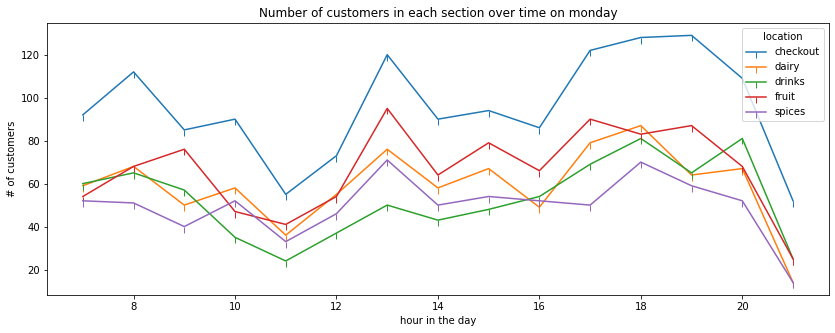

<Figure size 720x288 with 0 Axes>

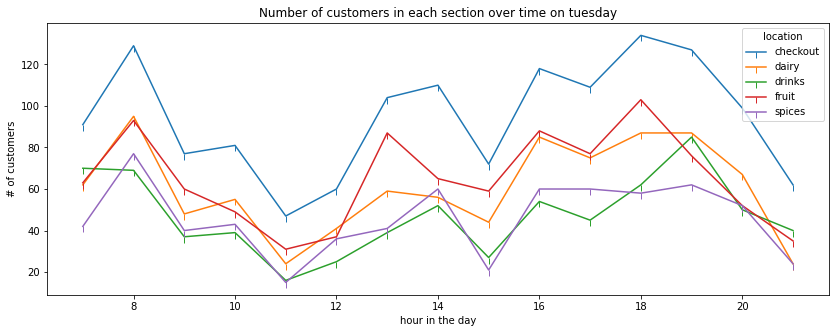

<Figure size 720x288 with 0 Axes>

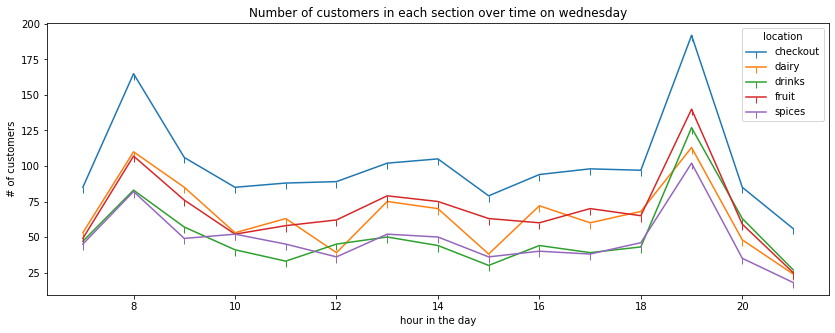

<Figure size 720x288 with 0 Axes>

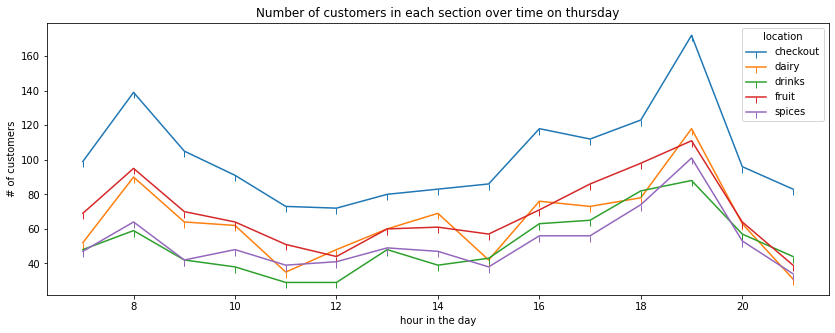

<Figure size 720x288 with 0 Axes>

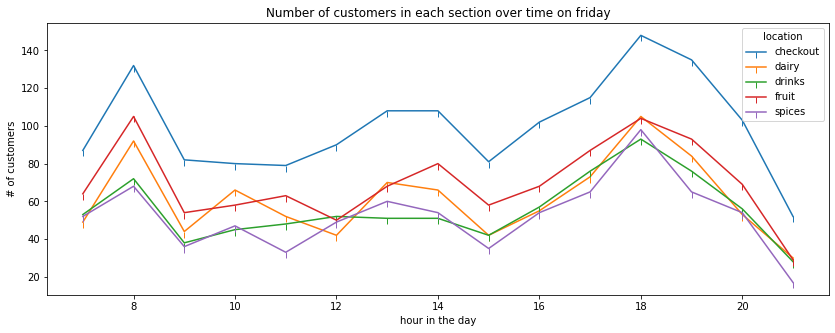

In [19]:
for day in df['weekday'].unique():
    plt.figure()
    df.loc[df['weekday'] == day].groupby(['hour', 'location'])['customer_no'].count().unstack().plot(marker = 3, figsize = (14,5))
    plt.title(f'Number of customers in each section over time on {day}')
    plt.xlabel('hour in the day')
    plt.ylabel('# of customers')

## The number of customers at checkout over time

In [20]:
df.loc[df['location'] == 'checkout'].groupby(['hour', 'weekday'])['customer_no'].count().unstack()

weekday,friday,monday,thursday,tuesday,wednesday
hour,,,,,
7,87,92,99,91,85
8,132,112,139,129,165
9,82,85,105,77,106
10,80,90,91,81,85
11,79,55,73,47,88
12,90,73,72,60,89
13,108,120,80,104,102
14,108,90,83,110,105
15,81,94,86,72,79


Text(0, 0.5, '# of customers')

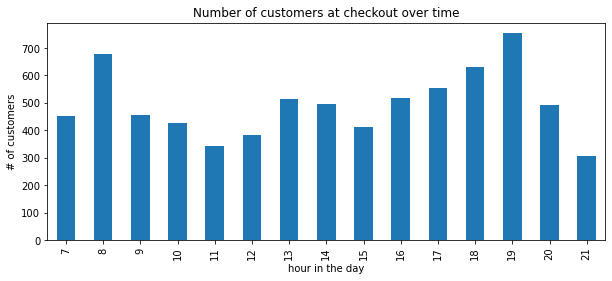

In [67]:
df.loc[df['location'] == 'checkout'].groupby(['hour'])['customer_no'].count().plot(kind='bar')
plt.title(f'Number of customers at checkout over time')
plt.xlabel('hour in the day')
plt.ylabel('# of customers')

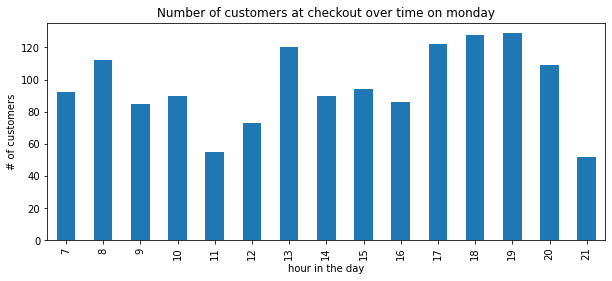

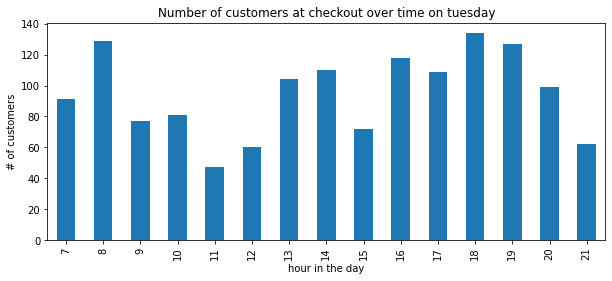

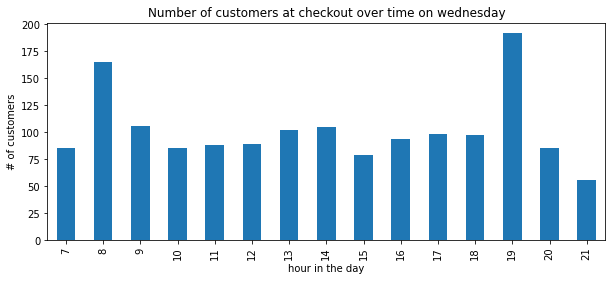

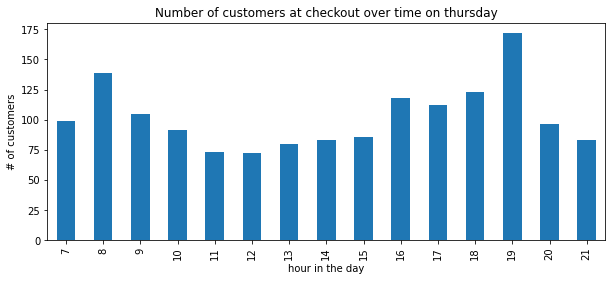

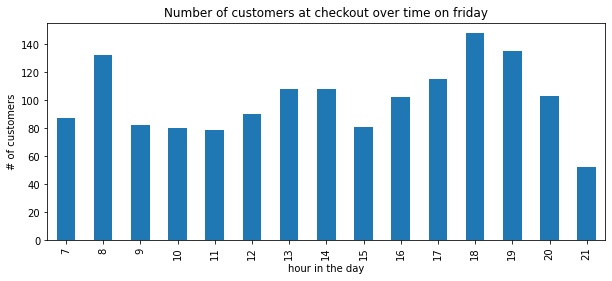

In [21]:
weekdays     = [monday,tuesday,wednesday,thursday,friday]
weekdays_str = df['weekday'].unique()
i = 0
for day in weekdays:
    plt.figure()
    day['hour']=day.index.hour
    day.loc[day['location'] == 'checkout'].groupby(['hour'])['customer_no'].count().plot(kind='bar')
    plt.title(f'Number of customers at checkout over time on {weekdays_str[i]}')
    plt.xlabel('hour in the day')
    plt.ylabel('# of customers')
    i +=1

## The time each customer spent in the market

In [22]:
first_section_time = df.reset_index().groupby(['weekday','customer_id'])['timestamp'].min()
checkout_time      = df.reset_index().groupby(['weekday','customer_id'])['timestamp'].max()

In [23]:
time_spent = (checkout_time - first_section_time).reset_index(name='time_spent')
pd.DataFrame(time_spent.groupby(['weekday'])['time_spent'].mean().dt.seconds/60)

,time_spent
weekday,
friday,6.333333
monday,6.450000
thursday,6.233333
tuesday,6.100000
wednesday,6.066667


Text(0, 0.5, 'minutes')

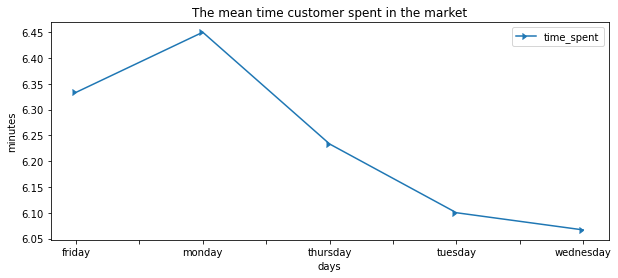

In [24]:
pd.DataFrame(time_spent.groupby(['weekday'])['time_spent'].mean().dt.seconds/60).plot(marker = 5)
plt.title('The mean time customer spent in the market')
plt.xlabel('days')
plt.ylabel('minutes')

In [25]:
pd.DataFrame(time_spent.groupby(['weekday'])['time_spent'].mean().dt.seconds/60)

,time_spent
weekday,
friday,6.333333
monday,6.450000
thursday,6.233333
tuesday,6.100000
wednesday,6.066667


## The total number of customers in the supermarket over time

In [26]:
df.groupby(['weekday','hour'])['customer_no'].nunique().unstack(0)

weekday,friday,monday,thursday,tuesday,wednesday
hour,,,,,
7,94,102,105,104,87
8,152,123,153,136,181
9,95,99,114,85,128
10,88,94,99,86,94
11,90,60,77,49,94
12,95,84,87,67,91
13,121,130,89,115,116
14,113,96,102,115,116
15,88,100,93,80,84


Text(0, 0.5, '# of customers')

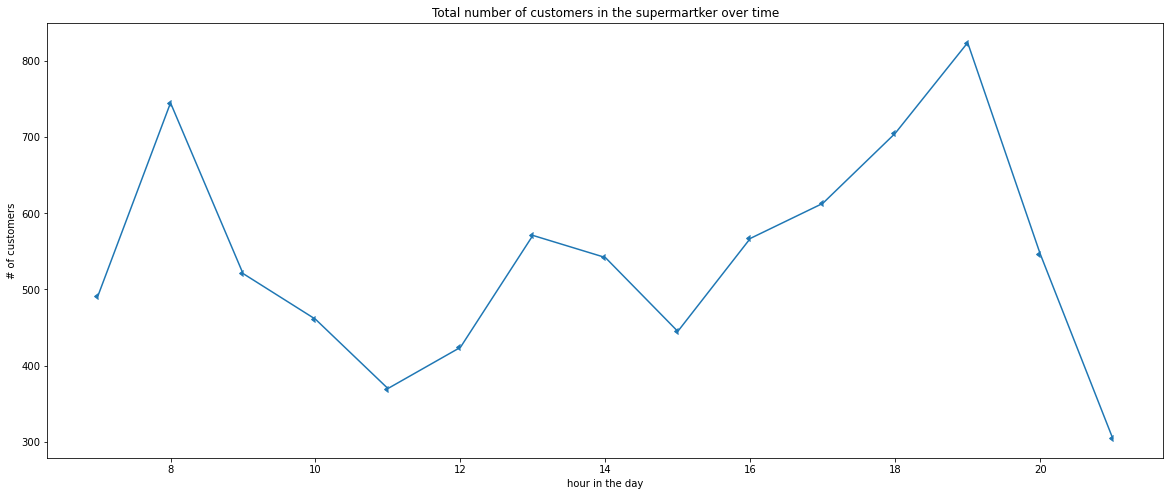

In [70]:
df.groupby(['hour'])['customer_id'].nunique().plot(marker=8, figsize=(20,8))
plt.title('Total number of customers in the supermartker over time')
plt.xlabel('hour in the day')
plt.ylabel('# of customers')

Text(0, 0.5, '# of customers')

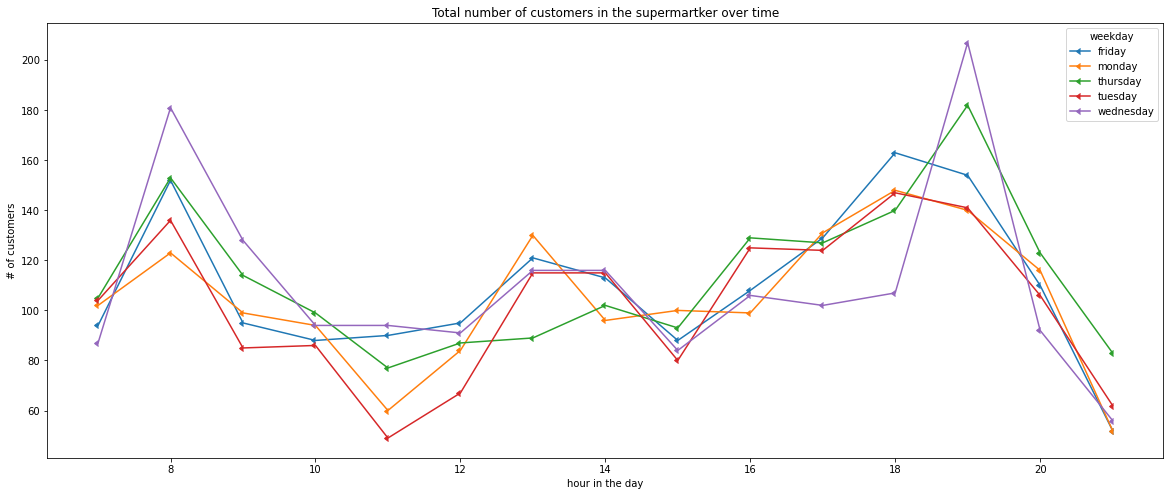

In [27]:
df.groupby(['weekday','hour'])['customer_no'].nunique().unstack(0).plot(marker = 8, figsize = (20,8))
plt.title('Total number of customers in the supermartker over time')
plt.xlabel('hour in the day')
plt.ylabel('# of customers')


## Plot the distribution of customers of their first visited section versus following sections

In [28]:
entrance_time = df.reset_index().groupby(['customer_id'])['timestamp'].min()
entrance_time

customer_id
1000_fr   2019-09-06 17:19:00
1000_mo   2019-09-02 17:44:00
1000_th   2019-09-05 17:23:00
1000_tu   2019-09-03 17:53:00
1000_we   2019-09-04 16:53:00
                  ...        
9_fr      2019-09-06 07:06:00
9_mo      2019-09-02 07:06:00
9_th      2019-09-05 07:07:00
9_tu      2019-09-03 07:10:00
9_we      2019-09-04 07:03:00
Name: timestamp, Length: 7417, dtype: datetime64[ns]

In [29]:
for customer in df['customer_id'].unique():
    df.loc[
        (df.customer_id == customer) & (df.index == entrance_time[customer]),
        'section_status',
          ] = 'first'
  

In [30]:
df['section_status'].fillna('following', inplace=True)

In [31]:
df.sample(10)

,customer_id,customer_no,location,weekday,hour,section_status
timestamp,,,,,,
2019-09-02 17:30:00,951_mo,951,checkout,monday,17,following
2019-09-04 11:57:00,533_we,533,fruit,wednesday,11,following
2019-09-05 12:09:00,518_th,518,drinks,thursday,12,following
2019-09-02 07:41:00,43_mo,43,dairy,monday,7,following
2019-09-06 13:47:00,638_fr,638,fruit,friday,13,following
2019-09-05 20:17:00,1378_th,1378,dairy,thursday,20,following
2019-09-05 18:18:00,1089_th,1089,dairy,thursday,18,following
2019-09-06 14:21:00,705_fr,705,drinks,friday,14,following
2019-09-06 20:34:00,1408_fr,1408,checkout,friday,20,following


In [32]:
first_section_customers = df[df.section_status == 'first'].groupby('location')[['customer_id']].count()
first_section_customers

,customer_id
location,
dairy,2126
drinks,1139
fruit,2804
spices,1348


In [33]:
probabilities = first_section_customers / sum(first_section_customers['customer_id'])
round(probabilities,2)

,customer_id
location,
dairy,0.29
drinks,0.15
fruit,0.38
spices,0.18


In [34]:
df.groupby(['location','section_status'])[['customer_id']].count().unstack(-1)

customer_id          
section_status       first following
location                            
checkout               NaN    7417.0
dairy               2126.0    2525.0
drinks              1139.0    2750.0
fruit               2804.0    2298.0
spices              1348.0    2391.0

Text(0, 0.5, '# of customers')

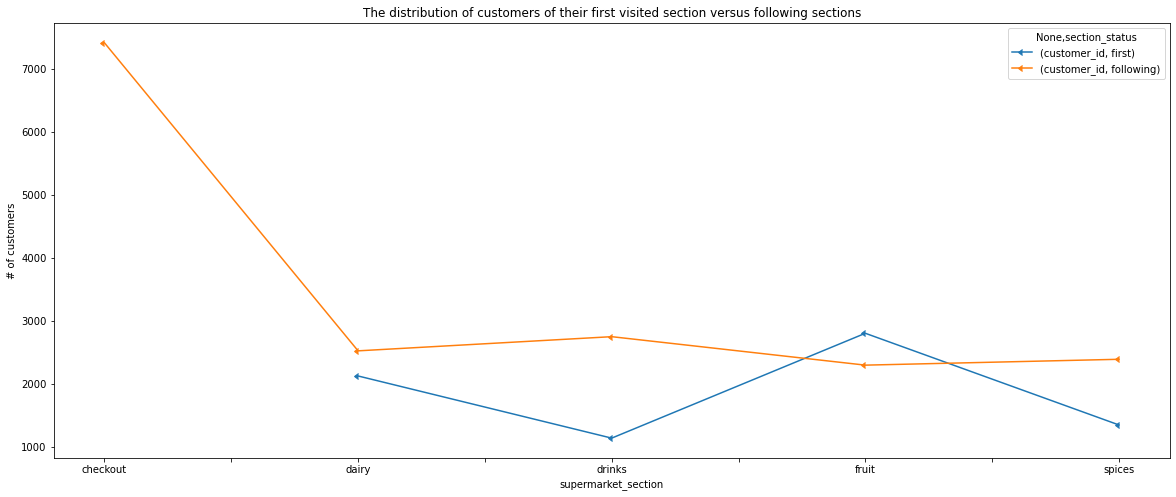

In [73]:
df.groupby(['location','section_status'])[['customer_id']].count().unstack(-1).plot(marker=8, figsize=(20,8))
plt.title('The distribution of customers of their first visited section versus following sections')
plt.xlabel('supermarket_section')
plt.ylabel('# of customers')


# Transition Probabilities

In [36]:
# sort by timestamp and customer_no
df.sort_values(['timestamp','customer_no'])

,customer_id,customer_no,location,weekday,hour,section_status
timestamp,,,,,,
2019-09-02 07:03:00,1_mo,1,dairy,monday,7,first
2019-09-02 07:03:00,2_mo,2,dairy,monday,7,first
2019-09-02 07:04:00,3_mo,3,dairy,monday,7,first
2019-09-02 07:04:00,4_mo,4,dairy,monday,7,first
2019-09-02 07:04:00,5_mo,5,spices,monday,7,first
...,...,...,...,...,...,...
2019-09-06 21:48:00,1504_fr,1504,checkout,friday,21,following
2019-09-06 21:48:00,1507_fr,1507,dairy,friday,21,first
2019-09-06 21:48:00,1508_fr,1508,dairy,friday,21,first


In [37]:
# determine the previous location to use shift
df['previous_location'] = df.groupby(['customer_id'])['location'].shift(periods=1)

In [38]:
# the previous location is assigned to 'entrance'
df['previous_location'].fillna ('entrance', inplace=True)

In [39]:
df[df['customer_id']=='7_mo']

,customer_id,customer_no,location,weekday,hour,section_status,previous_location
timestamp,,,,,,,
2019-09-02 07:04:00,7_mo,7,spices,monday,7,first,entrance
2019-09-02 07:05:00,7_mo,7,drinks,monday,7,following,spices
2019-09-02 07:09:00,7_mo,7,spices,monday,7,following,drinks
2019-09-02 07:11:00,7_mo,7,fruit,monday,7,following,spices
2019-09-02 07:13:00,7_mo,7,checkout,monday,7,following,fruit


In [40]:
# calculate transition probabilities and state
tp_0 = pd.crosstab ( df['previous_location'],df['location'],normalize='index')
# order the index and columns
tp = tp_0.reindex(['entrance', 'dairy', 'drinks', 'fruit', 'spices'], columns=['dairy', 'drinks', 'fruit', 'spices', 'checkout'])
round(tp,3)

location,dairy,drinks,fruit,spices,checkout
previous_location,,,,,
entrance,0.287,0.154,0.378,0.182,0.000
dairy,0.000,0.222,0.190,0.195,0.392
drinks,0.027,0.000,0.218,0.216,0.539
fruit,0.237,0.136,0.000,0.126,0.501
spices,0.324,0.273,0.152,0.000,0.252


In [41]:
tp.to_csv('transition_matrix.csv')

In [42]:
# transition probabilities matrix
tp_matrix = tp.values
tp_matrix[0,:]

array([0.2866388 , 0.15356613, 0.37805042, 0.18174464, 0.        ])

<AxesSubplot:xlabel='location', ylabel='previous_location'>

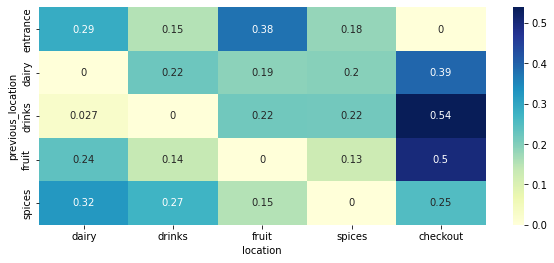

In [43]:
# visualize the probabilities as a heat map
sns.heatmap(tp,annot=True, cmap="YlGnBu")

# Monte-Carlo-Markov-Chain

In [44]:
def number():
    '''The function '''
    num = 1
    while True:
        yield num
        num = num + 1

In [45]:
f = Faker ()
num = number()

In [46]:
class Customer():
    
    '''a single customer that moves through the supermarket in a MCMC simulation
    '''
      
    def __init__(self):
       
        self.name   = f.name()
        self.number = next(num)
        self.state  = np.random.choice(['dairy', 'drinks', 'fruit', 'spices'], 
                                       p=probabilities['customer_id'] 
                                      )
        self.transition_probs = tp
    
      
    def is_active(self):
        return self.state != 'checkout' 
       
        
    def next_state(self):
        '''
        Propagates the customer to the next state. Returns nothing.
        '''
        
        self.state = np.random.choice(['dairy', 'drinks', 'fruit', 'spices', 'checkout'], 
                                      p=self.transition_probs.loc[self.state]
                                     )     

        
    def __repr__(self):
        return f'<{self.name} with {self.number} id number customer in {self.state} location>'

In [47]:
# just for a customer
cust = Customer()
cust.next_state()
print(cust)
cust.is_active()

<Amanda Ramos with 1 id number customer in checkout location>


False

In [48]:
# for 3 customers
for _ in range(3):
    cust = Customer()
    print(cust)
    while True:
        if cust.is_active() == False:
            print(f'{cust.name} has left the supermarket')
            break
        else: 
            cust.next_state()
            print(cust)   

<Jared Edwards with 2 id number customer in spices location>
<Jared Edwards with 2 id number customer in dairy location>
<Jared Edwards with 2 id number customer in checkout location>
Jared Edwards has left the supermarket
<Alicia Cruz with 3 id number customer in fruit location>
<Alicia Cruz with 3 id number customer in drinks location>
<Alicia Cruz with 3 id number customer in fruit location>
<Alicia Cruz with 3 id number customer in checkout location>
Alicia Cruz has left the supermarket
<Mary Spencer with 4 id number customer in spices location>
<Mary Spencer with 4 id number customer in dairy location>
<Mary Spencer with 4 id number customer in drinks location>
<Mary Spencer with 4 id number customer in checkout location>
Mary Spencer has left the supermarket


In [ ]:
# write result in CSV file

df_sim_result = pd.DataFrame()
df_sim_result['timestamp'] = timestamps
df_sim_result['customer_id'] = customer_ids
df_sim_result['customer_name'] = customer_names
df_sim_result['location'] = locations
df_sim_result.pd.to_csv('simulation_result.csv')

# Simulate a population

In [ ]:
import datetime
datetime.timedelta(seconds=60)


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime


class Supermarket():
    
    '''manages multiple Customer instances that are currently in the market.
    '''

    def __init__(self):        
        # a list of Customer objects
       
        self.customers = []
        self.last_id = 0

    def __repr__(self):
        return ''

    def get_time(self):
        '''current time in HH:MM format
        '''
        return datetime.now()

    def print_customers(self):
        
        '''print all customers with the current time and id in CSV format.
        '''
              
        df_sim_result = pd.DataFrame()
        df_sim_result['timestamp'] = timestamps
        df_sim_result['customer_id'] = customer_ids
        df_sim_result['customer_name'] = customer_names
        df_sim_result['location'] = locations
        df_sim_result.pd.to_csv('simulation_result.csv')
   
        
    def next_minute(self):
        '''propagates all customers to the next state.
        '''
        for a in self.customers:
            a.next_state()
                    
    def add_new_customers(self,cust):
        
        '''randomly creates new customers.
        '''
        cust = Customer()
        self.customers.append(cust)
        self.last_id = cust.number

    def remove_exitsting_customers(self,cust):
        '''removes every customer that is not active any more.
        '''
  
        self.customers.remove(cust)
        print(f'The customer called {self.name} had checkout')
       

In [ ]:
supermarket = Supermarket()

In [ ]:
import datetime
timestamps     = []
customer_ids   = []
customer_names = []
locations      = []

current_time = pd.to_datetime('2022, 5, 6, 7:00')
add_minute = datetime.timedelta(seconds=60)

for _ in range(3):
    supermarket.add_new_customers(cust)
    timestamp = current_time
    customer_ids.append(cust.number)
    customer_names.append(cust.name)
    locations.append(cust.state)
    timestamps.append(timestamp)
    print(cust)
    
while timestamp <= pd.to_datetime('2022, 5, 6, 07:30'):
    
    supermarket.next_minute()

    
    for cust in supermarket.customers:
        if cust.is_active() == False:
            print(f'{cust.name} has left the supermarket')
            supermarket.remove_exitsting_customers(cust)
            supermarket.add_new_customers(cust)
            timestamp = timestamp
            customer_ids.append(cust.number)
            customer_names.append(cust.name)
            locations.append(cust.state)
            timestamps.append(timestamp)
        else: 
            cust.next_state()
            timestamp = current_time+add_minute
            customer_ids.append(cust.number)
            customer_names.append(cust.name)
            locations.append(cust.state)
            timestamps.append(timestamp)
            print(cust)   

In [ ]:
import datetime
timestamps     = []
customer_ids   = []
customer_names = []
locations      = []

current_time = pd.to_datetime('2022, 5, 6, 7:00')
add_minute = datetime.timedelta(seconds=60)

for _ in range(3):
    supermarket.add_new_customers(cust)
    timestamp = current_time
    customer_ids.append(cust.number)
    customer_names.append(cust.name)
    locations.append(cust.state)
    timestamps.append(timestamp)

while timestamp <= pd.to_datetime('2022, 5, 6, 21:50'):
    
    supermarket.next_minute()
    
    for c in supermarket.customers:
        timestamp = current_time+add_minute
        customer_ids.append(c.number)
        customer_names.append(c.name)
        locations.append(c.state)
        timestamps.append(timestamp)
        print(c)
        
    for c in supermarket.customers:
        if c.state == 'checkout':
            supermarket.remove_exitsting_customers()
            supermarket.add_new_customers(cust)
            timestamp = timestamp
            customer_ids.append(cust.number)
            customer_names.append(cust.name)
            locations.append(cust.state)
            timestamps.append(timestamp)
        else:
            a.next_state()
            timestamp = timestamp
            customer_ids.append(a.number)
            customer_names.append(a.name)
            locations.append(a.state)
            timestamps.append(timestamp)
                    
        

In [ ]:
supermarket.next_minute()

In [ ]:
supermarket.customers

In [ ]:
supermarket.add_new_customers(cust)

In [ ]:
 super().__init__(name, number, state, transition_probs)

In [ ]:
import cv2


TILE_SIZE = 32

MARKET = """
##################
##..............##
##..##..##..##..##
##..##..##..##..##
##..##..##..##..##
##..##..##..##..##
##..##..##..##..##
##...............#
##..C#..C#..C#...#
##..##..##..##...#
##...............#
##############GG##
""".strip()


class SupermarketMap:
    """Visualizes the supermarket background"""

    def __init__(self, layout, tiles):
        """
        layout : a string with each character representing a tile
        tiles   : a numpy array containing all the tile images
        """
        self.tiles = tiles
        # split the layout string into a two dimensional matrix
        self.contents = [list(row) for row in layout.split("\n")]
        self.ncols = len(self.contents[0])
        self.nrows = len(self.contents)
        self.image = np.zeros(
            (self.nrows*TILE_SIZE, self.ncols*TILE_SIZE, 3), dtype=np.uint8
                             )
        self.prepare_map()

    def extract_tile(self, row, col):
        """extract a tile array from the tiles image"""
        y = row*TILE_SIZE
        x = col*TILE_SIZE
        return self.tiles[y:y+TILE_SIZE, x:x+TILE_SIZE]

    def get_tile(self, char):
        """returns the array for a given tile character"""
        if char == "#":
            return self.extract_tile(0, 0)
        elif char == "G":
            return self.extract_tile(7, 3)
        elif char == "C":
            return self.extract_tile(2, 8)
        else:
            return self.extract_tile(1, 2)

    def prepare_map(self):
        """prepares the entire image as a big numpy array"""
        for row, line in enumerate(self.contents):
            for col, char in enumerate(line):
                bm = self.get_tile(char)
                y = row*TILE_SIZE
                x = col*TILE_SIZE
                self.image[y:y+TILE_SIZE, x:x+TILE_SIZE] = bm

    def draw(self, frame):
        """
        draws the image into a frame
        """
        frame[0:self.image.shape[0], 0:self.image.shape[1]] = self.image

    def write_image(self, filename):
        """writes the image into a file"""
        cv2.imwrite(filename, self.image)




In [ ]:
if __name__ == "__main__":

    background = np.zeros((500, 700, 3), np.uint8)
    tiles = cv2.imread("tiles.png")

    market = SupermarketMap(MARKET, tiles)

    while True:
        frame = background.copy()
        market.draw(frame)

        # https://www.ascii-code.com/
        key = cv2.waitKey(1)
       
        if key == 113: # 'q' key
            break
    
        cv2.imshow("frame", frame)


    cv2.destroyAllWindows()

    market.write_image("supermarket.png")


In [ ]:
from PIL import Image

In [ ]:
market_png = Image.open("market.png")

In [ ]:
market_array = np.array(market_png)
market_array.shape

In [ ]:
plt.imshow(market_array);